## Importing Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as st

## Importing Data

### Setup Working Directory [Discarded]

In [2]:
# #read the path
# file_path = ""

### Filtering Parquet Files from WD

In [3]:
#select parquet files only
par_files = glob.glob('nyc_green_taxi_parquet_format/*.{}'.format('parquet'))

In [4]:
# trips = pd.read_parquet('nyc_green_taxi_parquet_format/green_tripdata_2018-01.parquet', engine='pyarrow')
trips = pd.concat([pd.read_parquet(f,engine='pyarrow') for f in par_files ], ignore_index=True)
locations = pd.read_csv('taxi_zone.csv')

## Export CSV [DISABLED]

In [5]:
#trips.to_csv('greeen_trip_2018_consolidated.csv')

## Data Verification using basic Analysis

In [6]:
trips.shape

(792744, 20)

In [7]:
trips.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [8]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792744 entries, 0 to 792743
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               792744 non-null  int64         
 1   lpep_pickup_datetime   792744 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  792744 non-null  datetime64[ns]
 3   store_and_fwd_flag     792744 non-null  object        
 4   RatecodeID             792744 non-null  int64         
 5   PULocationID           792744 non-null  int64         
 6   DOLocationID           792744 non-null  int64         
 7   passenger_count        792744 non-null  int64         
 8   trip_distance          792744 non-null  float64       
 9   fare_amount            792744 non-null  float64       
 10  extra                  792744 non-null  float64       
 11  mta_tax                792744 non-null  float64       
 12  tip_amount             792744 non-null  floa

### Check Anomalies using 

In [9]:
null_values_count = trips.isna().sum()
empty_Cols = {}
empty_percentage = 95
for column,data in null_values_count.iteritems():
    null_pc = (data/len(trips)) * 100
    if null_pc > empty_percentage :
        empty_Cols[column] = null_pc
        trips = trips.drop([column], axis=1)

print ("Below Fields are more than "+ str(empty_percentage) + "% Empty and Automatically Removed")
print(empty_Cols)
print("Updated Data")
trips.head()

Below Fields are more than 95% Empty and Automatically Removed
{'ehail_fee': 100.0, 'congestion_surcharge': 100.0}
Updated Data


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-01-01 00:18:50,2018-01-01 00:24:39,N,1,236,236,5,0.70,6.0,0.5,0.5,0.0,0.0,0.3,7.3,2,1.0
1,2,2018-01-01 00:30:26,2018-01-01 00:46:42,N,1,43,42,5,3.50,14.5,0.5,0.5,0.0,0.0,0.3,15.8,2,1.0
2,2,2018-01-01 00:07:25,2018-01-01 00:19:45,N,1,74,152,1,2.14,10.0,0.5,0.5,0.0,0.0,0.3,11.3,2,1.0
3,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,3,1.0
4,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,3.0,0.5,0.5,0.0,0.0,0.3,4.3,2,1.0


In [10]:
trips.head(-1)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-01-01 00:18:50,2018-01-01 00:24:39,N,1,236,236,5,0.70,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2,1.0
1,2,2018-01-01 00:30:26,2018-01-01 00:46:42,N,1,43,42,5,3.50,14.5,0.5,0.5,0.00,0.0,0.3,15.80,2,1.0
2,2,2018-01-01 00:07:25,2018-01-01 00:19:45,N,1,74,152,1,2.14,10.0,0.5,0.5,0.00,0.0,0.3,11.30,2,1.0
3,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,-3.0,-0.5,-0.5,0.00,0.0,-0.3,-4.30,3,1.0
4,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,3.0,0.5,0.5,0.00,0.0,0.3,4.30,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792738,2,2018-01-31 23:34:07,2018-01-31 23:43:38,N,1,80,198,1,2.59,10.0,0.5,0.5,0.00,0.0,0.3,11.30,2,1.0
792739,2,2018-01-31 23:42:10,2018-01-31 23:43:24,N,1,120,243,1,0.51,3.5,0.5,0.5,0.00,0.0,0.3,4.80,2,1.0
792740,2,2018-02-01 00:00:48,2018-02-01 00:08:11,N,1,41,116,1,1.46,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2,1.0
792741,2,2018-01-31 23:19:43,2018-01-31 23:23:41,N,1,41,42,1,1.04,5.5,0.5,0.5,0.00,0.0,0.3,6.80,2,1.0


In [11]:
trips.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792741.000000
mean,1.826307,1.074549,109.994698,128.606592,1.362838,2.665351,11.734082,0.339536,0.487984,1.035210,0.084959,0.293027,14.001791,1.475638,1.018217
std,0.378845,0.565258,74.422768,77.166692,1.047155,2.844045,10.163493,0.395044,0.083898,1.893419,1.020368,0.049675,11.086153,0.521874,0.133734
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-183.000000,-4.500000,-0.500000,-2.720000,0.000000,-0.300000,-183.000000,1.000000,1.000000
25%,2.000000,1.000000,49.000000,61.000000,1.000000,0.990000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,7.800000,1.000000,1.000000
50%,2.000000,1.000000,82.000000,129.000000,1.000000,1.700000,9.000000,0.000000,0.500000,0.000000,0.000000,0.300000,10.800000,1.000000,1.000000
75%,2.000000,1.000000,166.000000,192.000000,1.000000,3.270000,14.000000,0.500000,0.500000,1.760000,0.000000,0.300000,16.800000,2.000000,1.000000
max,2.000000,99.000000,265.000000,265.000000,9.000000,140.620000,2126.000000,4.500000,0.500000,295.000000,557.550000,0.300000,2126.800000,5.000000,2.000000


In [12]:
trips['VendorID'].value_counts()

2    655050
1    137694
Name: VendorID, dtype: int64

In [13]:
trips['payment_type'].value_counts()

1    422994
2    364175
3      3893
4      1630
5        52
Name: payment_type, dtype: int64

Text(0, 0.5, 'Count')

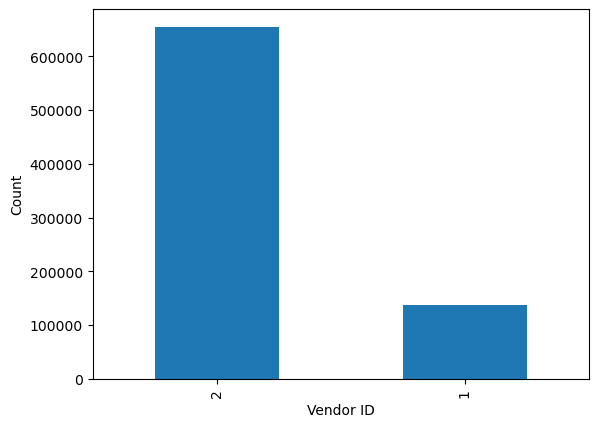

In [14]:
plot= trips['VendorID'].value_counts().plot(kind='bar')
plot.ticklabel_format(style='plain', axis='y') # to aviod value count in scienctific notation
plot.set_xlabel("Vendor ID")
plot.set_ylabel("Count")

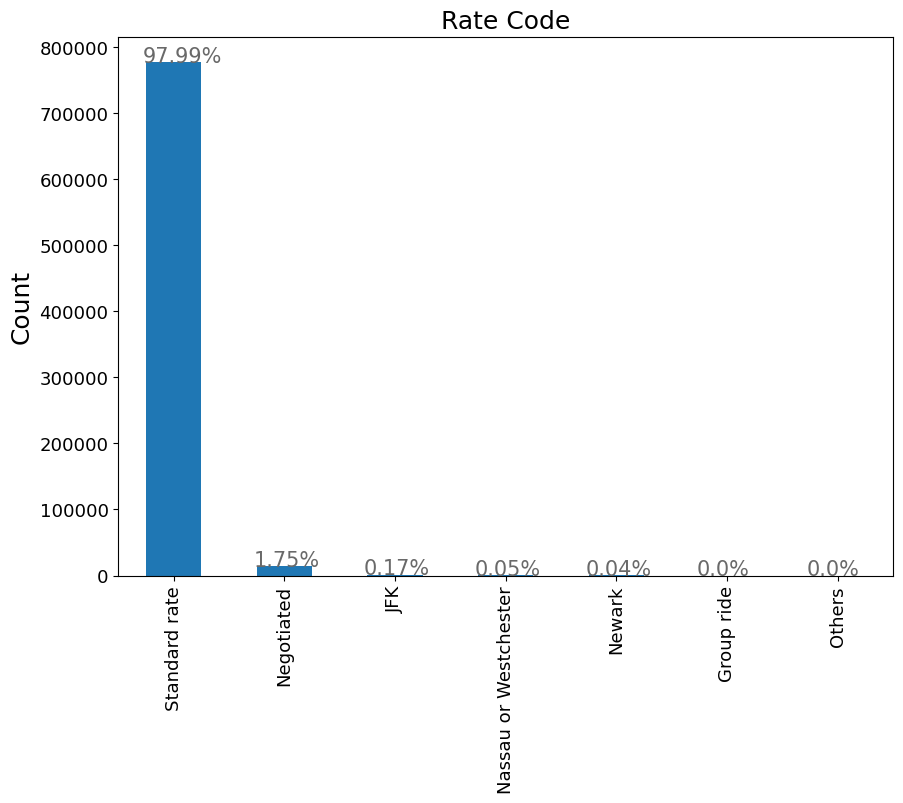

In [15]:
dict_map = {1: 'Standard rate' , 2: 'JFK'  ,3 :'Newark' , 4 : 'Nassau or Westchester' , 5:'Negotiated' , 6: 'Group ride' , 99 :'Others'}
ax = trips['RatecodeID'].map(dict_map).value_counts().plot(kind='bar', figsize=(10,7),
                                       fontsize=13);
ax.set_title("Rate Code", fontsize=18)
ax.set_ylabel("Count", fontsize=18);
ax.ticklabel_format(style='plain', axis='y')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

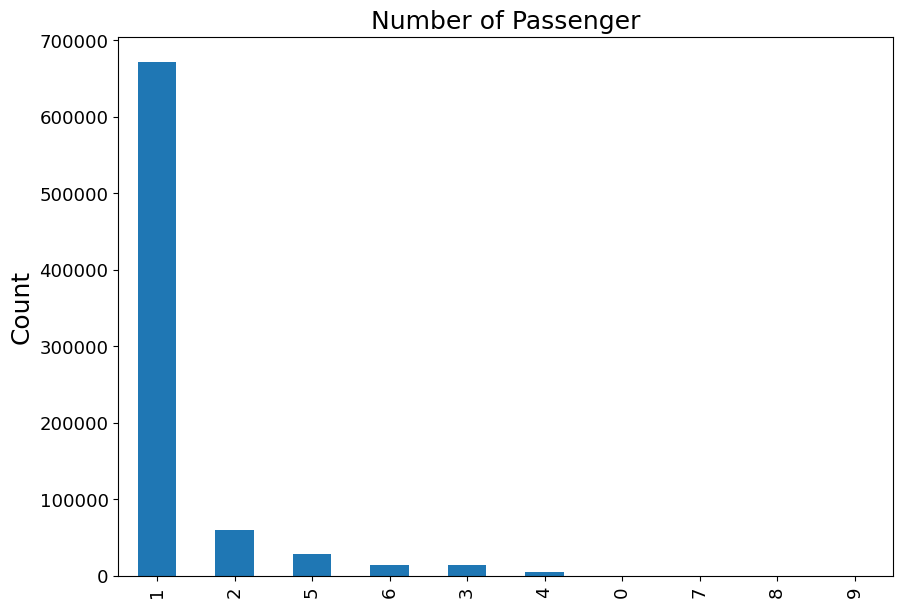

In [16]:
ax = trips['passenger_count'].value_counts().plot(kind='bar', figsize=(10,7),
                                       fontsize=13)
ax.set_title("Number of Passenger", fontsize=18)
ax.set_ylabel("Count", fontsize=18);
ax.ticklabel_format(style='plain', axis='y')

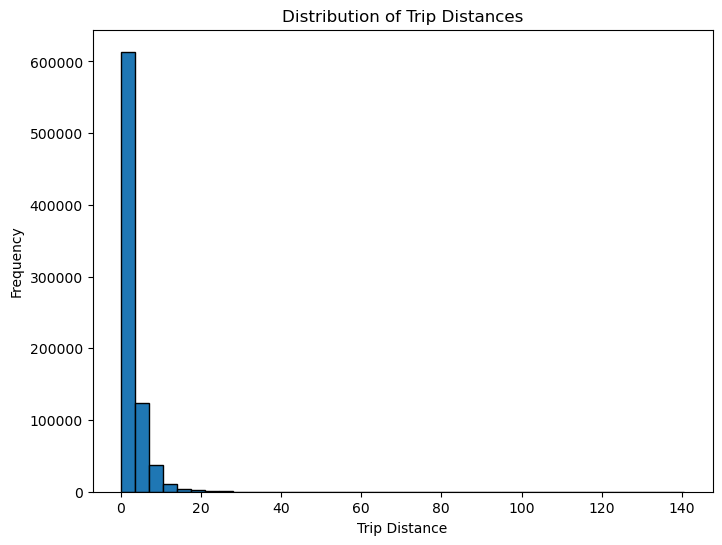

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(trips['trip_distance'], bins=40, edgecolor='black')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distances')
plt.show()

## Clean Up and Validations

In [18]:
Payment_Feilds = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']
trips['TotalFareAmount'] = trips[Payment_Feilds].sum(axis=1)
trips['Match'] = trips['TotalFareAmount'] == trips['total_amount']
filtered_df = trips[trips['Match'] == False]
not_matching = (trips['Match'].value_counts()/len(trips))*100
not_matching = '{:.1f}'.format(not_matching[0])
print ("Out of " + str(len(trips)) + " Trips "+ str(not_matching[0]) + " % of Total Ammount does not match with Calculation")

Out of 792744 Trips 9 % of Total Ammount does not match with Calculation


In [36]:
# Convert negative fares feilds to positive values using absolute function
trips['total_amount'] = trips['total_amount'].abs()
trips['TotalFareAmount'] = trips['TotalFareAmount'].abs()
trips['fare_amount'] = trips['fare_amount'].abs()
trips['extra'] = trips['extra'].abs()
trips['mta_tax'] = trips['mta_tax'].abs()
trips['tip_amount'] = trips['tip_amount'].abs()
trips['tolls_amount'] = trips['tolls_amount'].abs()
trips['improvement_surcharge'] = trips['improvement_surcharge'].abs()

## Calculated Columns 

In [19]:
trips['Pickup_Day'] = trips['lpep_pickup_datetime'].dt.strftime('%a')  # First three letters of the day
trips['Hour_of_day'] = trips['lpep_pickup_datetime'].dt.hour  # Extract hour from datetime

In [37]:
trips.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,TotalFareAmount,Match,Pickup_Day,Hour_of_day,Borough,Zone,service_zone
0,2,2018-01-01 00:18:50,2018-01-01 00:24:39,N,1,236,236,5,0.70,6.0,...,7.3,2,1.0,7.3,True,Mon,0,Manhattan,Upper East Side North,Yellow Zone
1,2,2018-01-01 00:30:26,2018-01-01 00:46:42,N,1,43,42,5,3.50,14.5,...,15.8,2,1.0,15.8,True,Mon,0,Manhattan,Central Park,Yellow Zone
2,2,2018-01-01 00:07:25,2018-01-01 00:19:45,N,1,74,152,1,2.14,10.0,...,11.3,2,1.0,11.3,True,Mon,0,Manhattan,East Harlem North,Boro Zone
3,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,3.0,...,4.3,3,1.0,4.3,True,Mon,0,Brooklyn,Williamsburg (North Side),Boro Zone
4,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,3.0,...,4.3,2,1.0,4.3,True,Mon,0,Brooklyn,Williamsburg (North Side),Boro Zone


## EDA using Plots

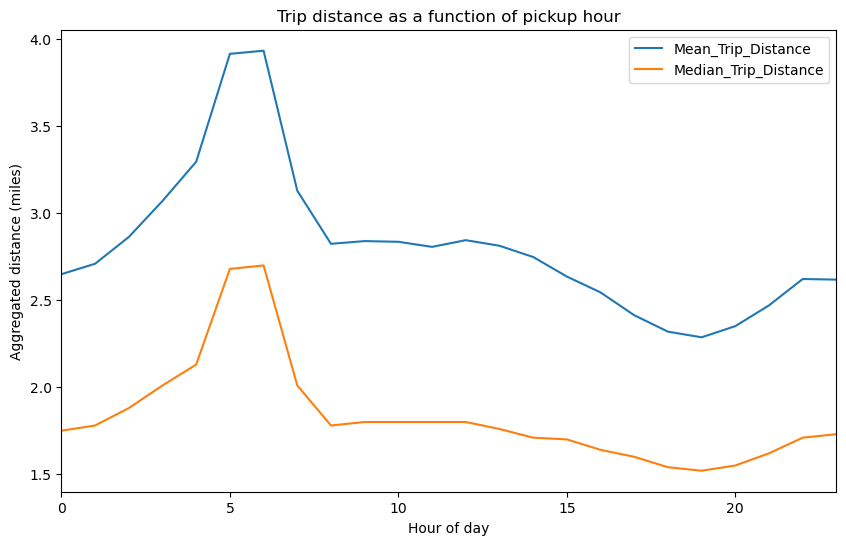

Trip distance grouped by hour of the day: 

 Hour_of_day  Mean_Trip_Distance  Median_Trip_Distance
           0            2.649627                  1.75
           1            2.709711                  1.78
           2            2.863419                  1.88
           3            3.070592                  2.01
           4            3.296085                  2.13
           5            3.916230                  2.68
           6            3.934114                  2.70
           7            3.129682                  2.01
           8            2.824211                  1.78
           9            2.839894                  1.80
          10            2.835883                  1.80
          11            2.806671                  1.80
          12            2.845205                  1.80
          13            2.813104                  1.76
          14            2.748483                  1.71
          15            2.636090                  1.70
          16         

In [22]:
# Pivot table method of dataframe to get aggregation of Trip distance by hour.
Aggregation_Chart = trips.pivot_table(
    index="Hour_of_day", values="trip_distance", aggfunc=("mean", "median")
).reset_index()

figure, axes = plt.subplots(figsize=(10, 6))
Aggregation_Chart.columns = [
    "Hour_of_day",
    "Mean_Trip_Distance",
    "Median_Trip_Distance",
]

Aggregation_Chart[["Mean_Trip_Distance", "Median_Trip_Distance"]].plot(ax=axes)
plt.ylabel("Aggregated distance (miles)")
plt.xlabel("Hour of day")
plt.title("Trip distance as a function of pickup hour")
plt.xlim([0, 23])
plt.show()
print("Trip distance grouped by hour of the day: \n")

print(Aggregation_Chart.to_string(index=False))

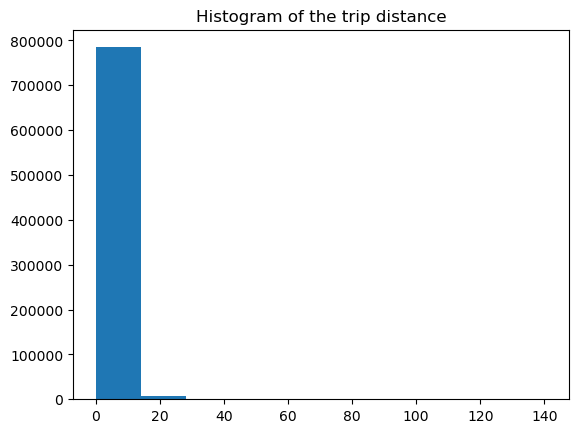

In [23]:
plt.hist(trips["trip_distance"])
plt.title('Histogram of the trip distance')
plt.show()

/Users/pareekkarishamagmail.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance'>

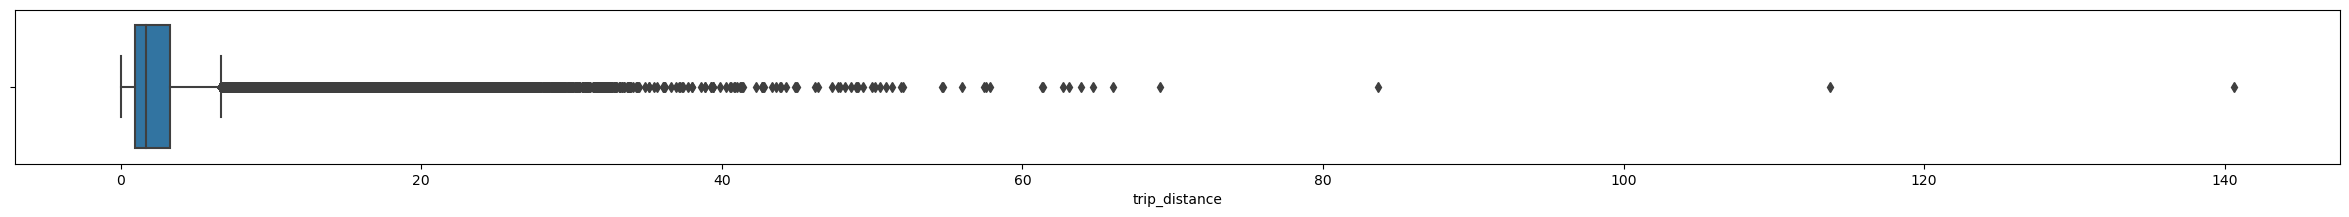

In [24]:
plt.figure(figsize=[30,2])
sns.boxplot(trips['trip_distance'])

In [25]:
print(f"There are {trips[trips['trip_distance']==0].shape[0]} records with Trip distance being zero.")

There are 9215 records with Trip distance being zero.


In [26]:
#Removing records in which trip distance is 0.
trip_Distance = trips.trip_distance[trips.trip_distance>0]
#Removing records in which trip distance is 3 standard deviations away from mean.

trip_Distance = trip_Distance[(trip_Distance-trip_Distance.median()).abs() < 4*trip_Distance.std()]

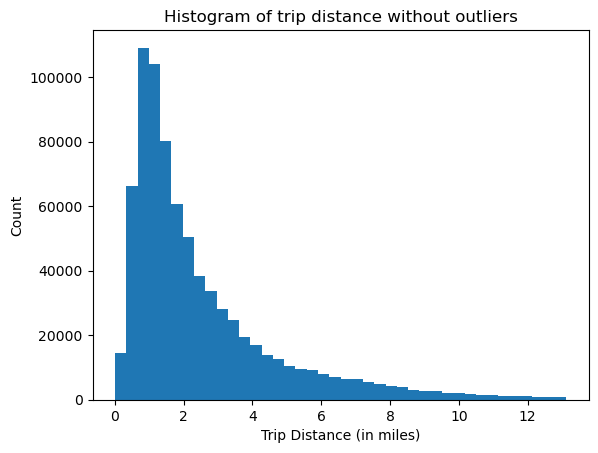

In [27]:
#Plotting histogram with 40 bins.
plt.hist(trip_Distance,bins = 40)
plt.title('Histogram of trip distance without outliers')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

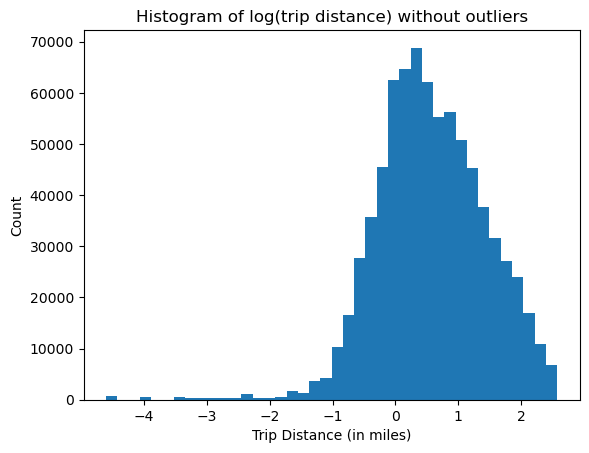

In [28]:
#Plotting histogram with 40 bins.
plt.hist(np.log(trip_Distance),bins = 40)
plt.title('Histogram of log(trip distance) without outliers')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()